<a href="https://colab.research.google.com/github/masa512/SA/blob/main/SA_UNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ../content
!git clone https://masa512:@github.com/masa512/SA.git

!git config --global user.email "ms4@illinois.edu"
!git config --global user.name "masa512"

%cd SA

/content
Cloning into 'SA'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 62 (delta 28), reused 20 (delta 9), pack-reused 0
Unpacking objects: 100% (62/62), 2.51 MiB | 4.87 MiB/s, done.
/content/SA


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import circ_sample
import data_process
import model
import loss
import torch.optim as optim

from tqdm import tqdm
%load_ext autoreload
%autoreload 2

# Test Circular Sample Function

# Plotting 2D Fourier Spectrum before sampling and after sample at center

# Stitching operation

In [ ]:
!git commit -a -m "Final commit before "

NotImplementedError: ignored

In [ ]:
!git push origin main


Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 317 bytes | 317.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/masa512/SA.git
   1892aa0..d5a9be3  main -> main


In [ ]:

!unzip "data.zip" -d "."


In [4]:
trainset = data_process.dog_train_dataset(rad=30,L=3)
testset = data_process.dog_test_dataset(rad=30,L=3)

In [5]:
(I,F,M) = testset[0]

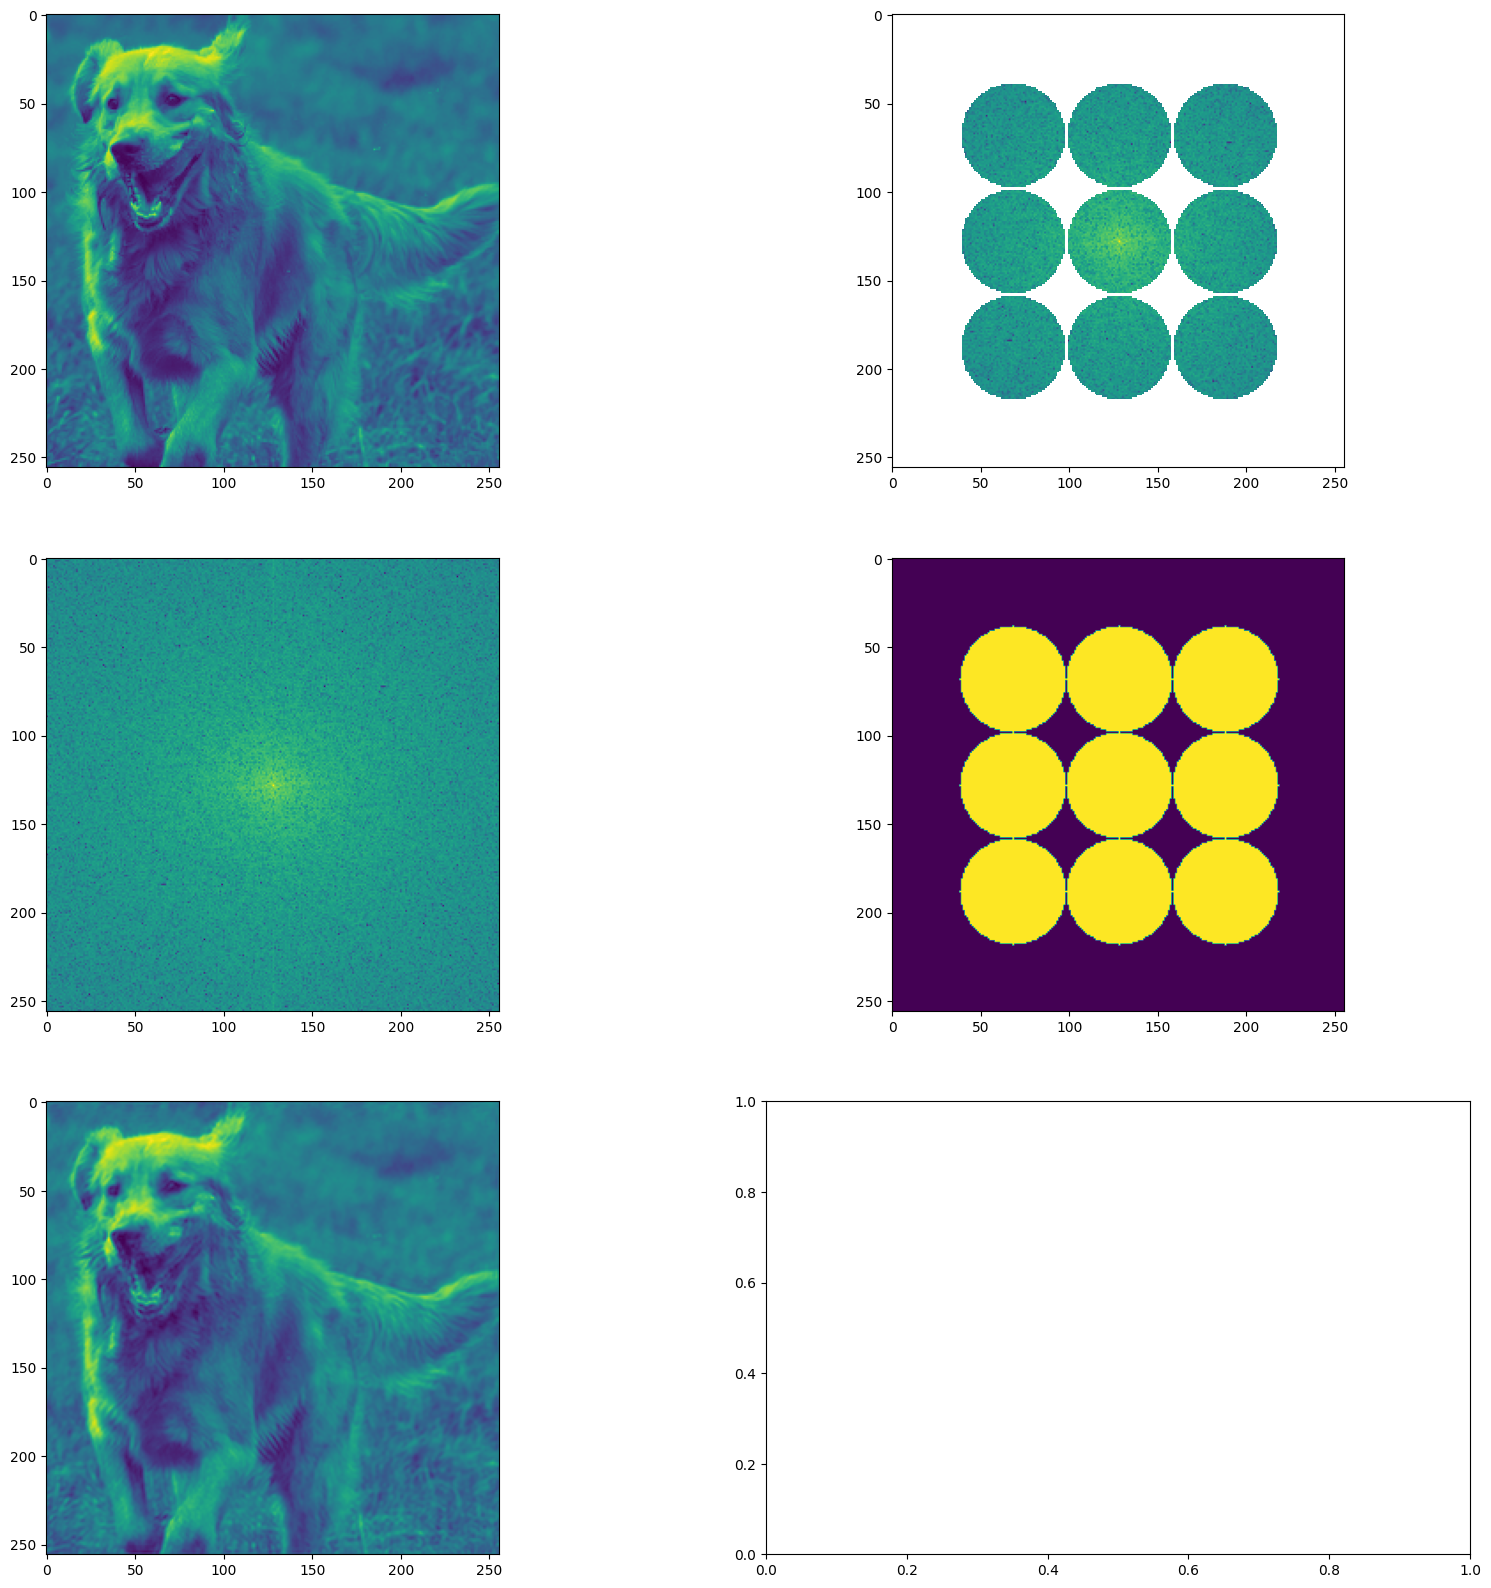

In [6]:
from scipy.fft import ifftn,fftn,fftshift,ifftshift

f,axes = plt.subplots(3,2,figsize=(20,20))
axes = np.ravel(axes)
import torch
m = M[0,:,:]
axes[0].imshow(I)
axes[1].imshow(torch.log(abs(F[0,:,:]*m)))
axes[2].imshow(torch.log(abs(F[0,:,:])))
axes[3].imshow(m)
axes[4].imshow(abs(ifftn(ifftshift(m*(F[0,:,:]+1j*F[1,:,:])))))

In [7]:
from torch.utils.data import DataLoader

batchsize = 16
trainloader = DataLoader(trainset,16,shuffle=True)
testloader = DataLoader(testset,1,shuffle=False)

# Loss

1. Reconstruction loss on image domain
2. Smoothness constraint on the Fourier spectrum

# Training Sequence

In [17]:
def train(net,num_epochs,train_loader,test_loader,optimizer,lr_scheduler,lmbda):

  # Training_set
  # Epoch loss to return
  t_train_loss = []
  t_val_loss = []

  #Loss fnx
  loss1 = loss.recon_loss().to('cuda')
  loss2 = loss.s_loss(lmb=lmbda).to('cuda')

  # Training loop
  for t in range(num_epochs):
    print(f"------------epoch{t+1}--------------")
    net.train() # train mode
    b_train_loss = [] # batch_loss for training
    b_val_loss = [] # batch_loss for validation

    net.train()
    for I,F,M in tqdm(train_loader):
      # zero_gradient
      optimizer.zero_grad()

      # Parameters to cuda
      I = I.to('cuda')
      F = F.to('cuda')
      M = M.to('cuda')

      # Prediction over input images
      F_out = net(F,M)

      # Evaluate compound loss function
      L = loss1(F,F_out,M,I) + loss2(F_out,M)

      # Backprop
      L.backward()
      optimizer.step()

      # Append to b_train_loss (batch)
      b_train_loss.append(L.item())

    net.eval()
    with torch.no_grad():
      for I,F,M in tqdm(test_loader):
        # Parameters to cuda
        I = I.to('cuda')
        F = F.to('cuda')
        M = M.to('cuda')

        # Prediction over input images
        F_out = net(F,M)

        # Evaluate compound loss function
        L = loss1(F,F_out,M,I) + loss2(F_out,M)

        # append to b_val_loss (batch)
        b_val_loss.append(L.item())

    # Save the losses to t_val/t_train loss
    t_train_loss.append(sum(b_train_loss)/len(b_train_loss))
    t_val_loss.append(sum(b_val_loss)/len(b_train_loss))

    # Print out the validation loss
    print(f'===> Epoch {t+1}: Train Loss -> {t_train_loss[-1]}')
    print(f'===> Epoch {t+1}: Validation Loss -> {t_val_loss[-1]}')

  

In [31]:
net = model.PUnet(2,16,2).to('cuda')
lr = 1e-3
optimizer = optim.Adam(net.parameters(),lr=lr)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=2)
num_epochs = 30
lmbda = 0

train(net,num_epochs,trainloader,testloader,optimizer,lr_scheduler,lmbda)

------------epoch1--------------


  3%|▎         | 1/32 [00:00<00:10,  3.07it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


  6%|▋         | 2/32 [00:00<00:09,  3.08it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


  9%|▉         | 3/32 [00:00<00:09,  3.10it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


 12%|█▎        | 4/32 [00:01<00:08,  3.11it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


 16%|█▌        | 5/32 [00:01<00:08,  3.13it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


 19%|█▉        | 6/32 [00:01<00:08,  3.08it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


 22%|██▏       | 7/32 [00:02<00:08,  3.08it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


 25%|██▌       | 8/32 [00:02<00:07,  3.07it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


 25%|██▌       | 8/32 [00:02<00:08,  2.85it/s]


KeyboardInterrupt: ignored

In [14]:
from torch.fft import ifft2,ifftshift
def reconstruction(Fout,Fin,M):
  Mprime = torch.ones_like(M)-M
  F = Fin*M + Fout*Mprime
  F = F[:,0,:,:] + 1j * F[:,1,:,:]
  Ipred = abs(ifft2(ifftshift(F)))
  return Ipred

True


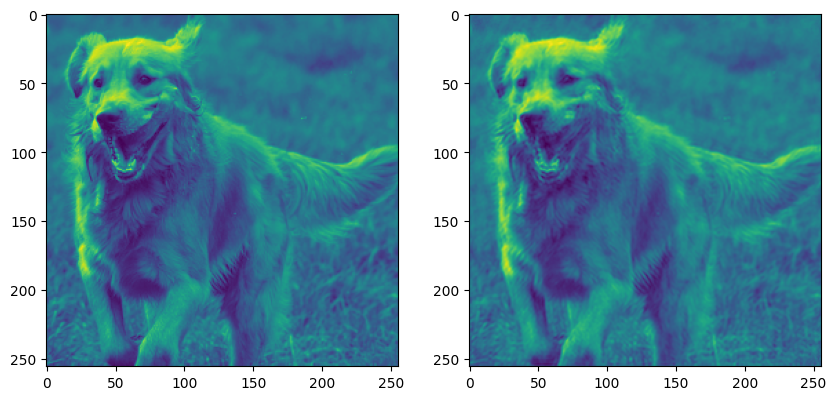

In [30]:
# Test using one of the images
(I,F,M) = testset[0]
F = F.unsqueeze(0).to('cuda')
M = M.unsqueeze(0).to('cuda')



# Model pass
Fout = net(F,M).squeeze(0)
print(Fout.requires_grad)
Ipred = reconstruction(Fout,F,M).cpu()
# Plot

f,axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(I)

axes[1].imshow(Ipred.squeeze(0).detach())